In [1]:
use_gpu = True # Set to False to use CPU
dev = 2 
if use_gpu:
    import cupy as xp
    xp.cuda.runtime.setDevice(dev)

else:
    import numpy as xp

import numpy as np
import matplotlib.pyplot as plt
from cudakima import AkimaInterpolant1D

## Getting started

In [2]:
interp = AkimaInterpolant1D(sanitize=True, use_gpu=use_gpu)

In [3]:
# Generate some random data
xmin, xmax = 0, 10 # X Domain
ymin, ymax = -100, 100 # Y Domain
npoints = 10 # Number of points
nrealizations = 100 # Number of realizations

x = xp.random.random(size=(nrealizations, npoints)) * (xmax - xmin) + xmin
# Make sure the first and last points are the same
x[:, 0] = xmin
x[:, -1] = xmax
y = xp.random.random(size=(nrealizations, npoints)) * (ymax - ymin) + ymin


# Define the x values to interpolate
xinterp = xp.linspace(xmin, xmax, 1000)

In [4]:
result = interp(xinterp, x, y)

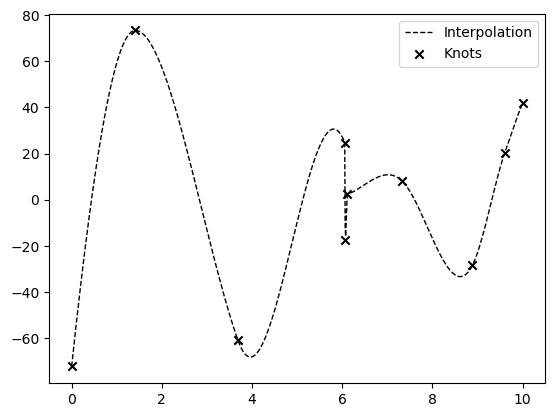

In [5]:
realization = 2

plt.plot(xinterp.get(), result.get()[realization], c='k', ls = '--', lw=1, label='Interpolation')
plt.scatter(x.get()[realization], y.get()[realization], marker='x', c='k', label='Knots')

plt.legend()
plt.show()